In [1]:
from octo.data.dataset import make_single_dataset
from octo.data.utils.data_utils import NormalizationType

2023-12-29 00:31:22.489247: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 00:31:22.531587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 00:31:22.531644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 00:31:22.533519: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 00:31:22.541370: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 00:31:22.541921: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
data_dir = "/home/jannik/Downloads/example_sim_data/aloha_sim_dataset/"

dataset = make_single_dataset(
    dataset_kwargs=dict(
        name="aloha_sim_cube_scripted_dataset",
        data_dir=data_dir,
        image_obs_keys={"primary": "top"},
        state_obs_keys=["state"],
        language_key="language_instruction",
        action_proprio_normalization_type=NormalizationType.NORMAL,
        absolute_action_mask=[True] * 14,
    ),
    traj_transform_kwargs=dict(
        window_size=1,
        future_action_window_size=49,  # so we get 50 actions for our action chunk
    ),
    frame_transform_kwargs=dict(
        resize_size={"primary": (256, 256)},
    ),
    train=True,
)

2023-12-29 00:31:25.393839: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-12-29 00:31:25.456254: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2023-12-29 00:31:25.983507: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


DLIMP: Core usage is through the `DLataset` a thin wrapper around `tf.data.Dataset` designed for working with datasets of trajectories

In [3]:
type(dataset)

dlimp.dataset.DLataset

In [4]:
len(dataset)

48

In [5]:
episodes = list(dataset)

In [6]:
episodes[0].keys()

dict_keys(['observation', 'task', 'action', 'dataset_name', 'absolute_action_mask'])

In [7]:
episodes[0]["observation"].keys()

dict_keys(['image_primary', 'proprio', 'timestep', 'pad_mask_dict', 'pad_mask'])

""

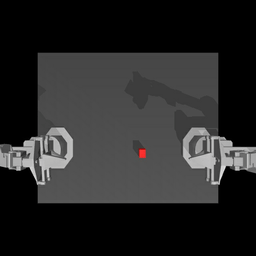

In [8]:
import matplotlib.pyplot as plt
import mediapy

images = []

for i in range(400):
    images.append(episodes[0]["observation"]["image_primary"][i,0,:,:,:].numpy())
    
mediapy.show_video(images[10:], fps=30, codec='gif')


In [11]:
for i, episode in enumerate(episodes[:12]):
    images=[]
    for j in range(400):
        images.append(episode["observation"]["image_primary"][j,0,:,:,:].numpy())
        
    path = f"./../export/episode{i+1}.gif"
    mediapy.write_video(path, images[10:], fps=30, codec='gif')